In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import sys

sys.path.append('..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [5]:
from vantgrd.datasets import read_connectionist_bench, normalize_data
from vantgrd.logistic import LogisticRegressionWithAdadelta, LogisticRegressionWithAdagrad, LogisticRegressionFTRL
from vantgrd.fm import FMWithAdagrad, FMWithSGD

In [8]:
rate = 500
epochs = 50
cw = {0: 1., 1: 1.}

X, y = read_connectionist_bench('../data/connectionist-bench/sonar.all-data')
X = normalize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# lr = FMWithSGD(eta=.01, k0=True, k1=True, regw=.01, regv=.01, n_factors=4, epochs=epochs, rate=rate, class_weight=cw))
lr = FMWithAdagrad(eta=.025, k0=True, k1=True, regw=.01, regv=.01, n_factors=4, epochs=epochs, rate=rate, class_weight=cw)
# lr = LogisticRegressionWithAdagrad(eta=0.25, epochs=epochs, rate=rate, class_weight=cw))
# lr = LogisticRegressionWithAdadelta(rho=0.8, regw=.001, epochs=epochs, rate=rate, class_weight=cw))
# lr = LogisticRegressionFTRL(epochs=epochs, rate=rate, class_weight=cw))
lr.fit(X_train, y_train)

print(lr.class_weight_)
print(lr.class_weight)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

y_test_prob = lr.raw_predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

roc_auc = auc(fpr, tpr)

print("AUC = %f" % roc_auc)
print("Score = {}".format(lr.score(X, y)))

Epoch:   2 | Training Samples:       500 | Loss:     1446.26 | LossAdj:  2.89252 | Time taken:    0 seconds
Epoch:   5 | Training Samples:      1000 | Loss:     1814.21 | LossAdj:  1.81421 | Time taken:    0 seconds
Epoch:   8 | Training Samples:      1500 | Loss:     2186.89 | LossAdj:  1.45793 | Time taken:    0 seconds
Epoch:  11 | Training Samples:      2000 | Loss:     2362.76 | LossAdj:  1.18138 | Time taken:    0 seconds
Epoch:  14 | Training Samples:      2500 | Loss:     2527.90 | LossAdj:  1.01116 | Time taken:    0 seconds
Epoch:  17 | Training Samples:      3000 | Loss:     2691.59 | LossAdj:  0.89720 | Time taken:    0 seconds
Epoch:  19 | Training Samples:      3500 | Loss:     2826.10 | LossAdj:  0.80746 | Time taken:    0 seconds
Epoch:  22 | Training Samples:      4000 | Loss:     2933.48 | LossAdj:  0.73337 | Time taken:    0 seconds
Epoch:  25 | Training Samples:      4500 | Loss:     3117.14 | LossAdj:  0.69270 | Time taken:    0 seconds
Epoch:  28 | Training Sample

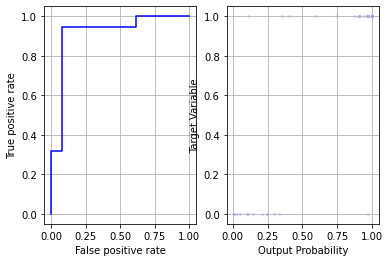

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.plot(fpr, tpr, color='blue', label='ROC area = %0.2f' % roc_auc)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.grid()

bx = fig.add_subplot(1, 2, 2)
bx.scatter(y_test_prob, y_test, s=5, alpha=0.10, color='blue')
bx.set_xlabel("Output Probability")
bx.set_ylabel("Target Variable")
bx.grid()

plt.show()